# 0.0 - Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime

from IPython.core.display import HTML
from IPython.display import Image
import scipy.stats as stats
from scipy.stats import iqr

import inflection

# Me ajudando a fazer meu primeiro projeto:
# https://www.kaggle.com/darkpsycs/real-estate-market-comprehensive-analysis

## 0.1 - Helper Functions

In [2]:
# Aumenta o tamanho dos gráficos de acordo com minha tela
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML ('<style>.container { width:100% !important;}</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()
    
# Definindo que vou usar apenas 2 casas decimáis e tirei a notação cientifica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 0.2 - Import Data

In [3]:
df_raw = pd.read_csv('Data/Melbourne_housing_FULL.csv')
df_raw.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,nan,nan,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


### 0.2.1 - Rename columns to snakecase

In [4]:
cols_old = ['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount']

snakecase = lambda x: inflection.underscore (x)
cols_new = list ( map(snakecase, cols_old))
df_raw.columns = cols_new
df_raw.head()

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,...,bathroom,car,landsize,building_area,year_built,council_area,lattitude,longtitude,regionname,propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,nan,nan,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,nan,nan,Yarra City Council,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00


# 1.0 - Data Description

In [5]:
# Criando uma cópia de segurança caso alguma coisa de errado aconteça
df1 = df_raw.copy()

### 1.1 - Discribing Columns

In [6]:
# Suburb: Pontos de referência na cidade de melbourne

# Address: Address

# Rooms: Number of rooms

# Price: Price in Australian dollars

# Method: Como a casa foi vendida, se ela foi vendida
# S - property sold;
# SP - property sold prior;
# PI - property passed in;
# PN - sold prior not disclosed;
# SN - sold not disclosed;
# NB - no bid;
# VB - vendor bid;
# W - withdrawn prior to auction;
# SA - sold after auction;
# SS - sold after auction price not disclosed.
# N/A - price or highest bid not available.

# Type: Tipo de casa
# br - bedroom(s);
# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;
# dev site - development site;
# o res - other residential.

# SellerG: Nome do Agente Imobiliário

# Date: Date sold

# Distance: Distance from CBD (central business district) in Kilometres | Distância do centro comercial

# Regionname: General Region (West, North West, North, North east …etc)

# Propertycount: Number of properties that exist in the suburb.

# Bedroom2 : Scraped # of Bedrooms (from different source) | Nâo sei muito bem para que serve

# Bathroom: Number of Bathrooms

# Car: Number of carspots | Quantos carros cabem na garagem

# Landsize: Land Size in Metres | Tamanho do terreno

# BuildingArea: Building Size in Metres | Tamanho da contrução

# YearBuilt: Year the house was built

# CouncilArea: Governing council for the area | Não sei muito bem para que serve

# Lattitude: Self explanitory

# Longtitude: Self explanitory

## 1.2 - Data Dimension

In [7]:

print('Number of rols of dataframe is', df1.shape[0])
print('Number of columns of dataframe is', df1.shape[1])


Number of rols of dataframe is 34857
Number of columns of dataframe is 21


## 1.3 - Data Description

In [8]:
df1.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'seller_g',
       'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car',
       'landsize', 'building_area', 'year_built', 'council_area', 'lattitude',
       'longtitude', 'regionname', 'propertycount'],
      dtype='object')

In [9]:
df1.dtypes

suburb            object
address           object
rooms              int64
type              object
price            float64
method            object
seller_g          object
date              object
distance         float64
postcode         float64
bedroom2         float64
bathroom         float64
car              float64
landsize         float64
building_area    float64
year_built       float64
council_area      object
lattitude        float64
longtitude       float64
regionname        object
propertycount    float64
dtype: object

In [10]:
df1.info()

# Aqui consegui a informação que eu tenho dados faltantes no meu DataFrame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   suburb         34857 non-null  object 
 1   address        34857 non-null  object 
 2   rooms          34857 non-null  int64  
 3   type           34857 non-null  object 
 4   price          27247 non-null  float64
 5   method         34857 non-null  object 
 6   seller_g       34857 non-null  object 
 7   date           34857 non-null  object 
 8   distance       34856 non-null  float64
 9   postcode       34856 non-null  float64
 10  bedroom2       26640 non-null  float64
 11  bathroom       26631 non-null  float64
 12  car            26129 non-null  float64
 13  landsize       23047 non-null  float64
 14  building_area  13742 non-null  float64
 15  year_built     15551 non-null  float64
 16  council_area   34854 non-null  object 
 17  lattitude      26881 non-null  float64
 18  longti

In [11]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,34857.00,3.03,0.97,1.00,2.00,3.00,4.00,16.00
price,27247.00,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
distance,34856.00,11.18,6.79,0.00,6.40,10.30,14.00,48.10
postcode,34856.00,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
bedroom2,26640.00,3.08,0.98,0.00,2.00,3.00,4.00,30.00
bathroom,26631.00,1.62,0.72,0.00,1.00,2.00,2.00,12.00
car,26129.00,1.73,1.01,0.00,1.00,2.00,2.00,26.00
landsize,23047.00,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
building_area,13742.00,160.26,401.27,0.00,102.00,136.00,188.00,44515.00
year_built,15551.00,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


# 2.0 Data Cleaning

In [12]:
df2 = df1.copy()

### 2.1 Changing Data Types

In [76]:
# Mudando as colunas object para Categoricas, para me ajuda quando for fazer a análise das variáveis categoricas
cols_object_type = df1.select_dtypes(['object']).columns
df2[cols_object_type] = df1[cols_object_type].astype('category')

# Mudando os tipos de dados da datas
df2['date'] = pd.to_datetime(df1['date'])

# Mudando o código postal para categórigo
df2['postcode'] = df1['postcode'].astype('category')

df2.dtypes

suburb                 category
address                category
rooms                     int64
type                   category
price                   float64
method                 category
seller_g               category
date             datetime64[ns]
distance                float64
postcode               category
bathroom                float64
car                     float64
council_area           category
regionname             category
propertycount           float64
price_range              object
year                     object
dtype: object

### 2.2 - Drop Columns

In [14]:
# Percebi que rooms é muito semelhante a bedroom2, logo decidi excluir bedroom2
examining = df2.loc[df1['rooms'] == df2['bedroom2'], 'rooms']
examining.count()

25692

In [15]:
df2 = df2.drop(['bedroom2', 'lattitude', 'longtitude'], axis=1)
df2.columns

Index(['suburb', 'address', 'rooms', 'type', 'price', 'method', 'seller_g',
       'date', 'distance', 'postcode', 'bathroom', 'car', 'landsize',
       'building_area', 'year_built', 'council_area', 'regionname',
       'propertycount'],
      dtype='object')

### 2.3 - Missing Values

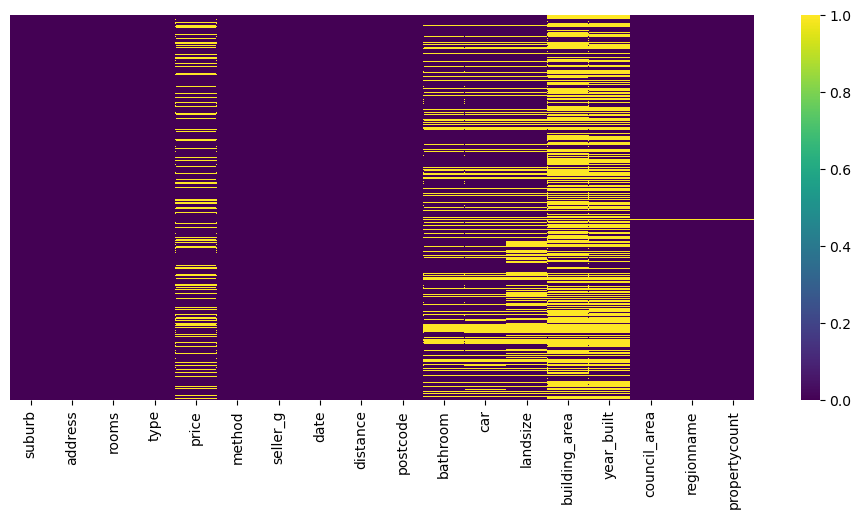

In [16]:
# visualizing missing values
fig, ax = plt.subplots(figsize=(12,5))
figure = sns.heatmap(df2.isnull(), yticklabels=False,cmap="viridis");
plt.show(figure)

In [17]:
# Porcentagem de dados faltantes em cada coluna
df2.isnull().sum()/len(df2)*100

suburb           0.00
address          0.00
rooms            0.00
type             0.00
price           21.83
method           0.00
seller_g         0.00
date             0.00
distance         0.00
postcode         0.00
bathroom        23.60
car             25.04
landsize        33.88
building_area   60.58
year_built      55.39
council_area     0.01
regionname       0.01
propertycount    0.01
dtype: float64

Podemos ver que as colunas *building_area* e *year_built* tem muitos dados faltantes, mais de 50% logo na minha análise elas se tornam descatáveis por conta do tanto de dados faltantes.

In [18]:
df2 = df2.drop(['building_area', 'year_built', 'landsize'], axis=1)

Como minha variável target é o preço, não posso simplesmente deletalo, porém vou deletar as linhas onde o preço é nulo

In [19]:
df2.dropna(subset=['price'], inplace=True)

In [20]:
df2['bathroom'] = df2['bathroom'].fillna(df2['bathroom'].mode()[0])

df2['car'] = df2['car'].fillna(df2['car'].mode()[0])

In [21]:
df2.isnull().sum()/len(df2)*100

suburb          0.00
address         0.00
rooms           0.00
type            0.00
price           0.00
method          0.00
seller_g        0.00
date            0.00
distance        0.00
postcode        0.00
bathroom        0.00
car             0.00
council_area    0.01
regionname      0.01
propertycount   0.01
dtype: float64

In [22]:
# Estou excluindo todas as linhas que tem algum valor nulo
df2 = df2.dropna(how='any')

### 2.4 - Outliers Detection

In [23]:
df2.describe()

,rooms,price,distance,bathroom,car,propertycount
count,27244.00,27244.00,27244.00,27244.00,27244.00,27244.00
mean,2.99,1050210.03,11.28,1.45,1.79,7566.78
std,0.95,641492.29,6.79,0.66,0.87,4492.38
min,1.00,85000.00,0.00,0.00,0.00,83.00
25%,2.00,635000.00,6.40,1.00,1.00,4294.00
50%,3.00,870000.00,10.50,1.00,2.00,6567.00
75%,4.00,1295000.00,14.00,2.00,2.00,10412.00
max,16.00,11200000.00,48.10,9.00,18.00,21650.00


#### Price
Nessa etapa estou agrupando os valores por um range de 1.000.000

In [24]:
df2['price_range'] = np.where(df2['price'] <= 100000, '0-100,000',  
                                       np.where ((df2['price'] > 100000) & (df2['price'] <= 1000000), '100,001 - 1M',
                                                np.where((df2['price'] > 1000000) & (df2['price'] <= 3000000), '1M - 3M',
                                                        np.where((df2['price']>3000000) & (df2['price']<=5000000), '3M - 5M',
                                                                np.where((df2['price']>5000000) & (df2['price']<=6000000), '5M - 6M',
                                                                        np.where((df2['price']>6000000) & (df2['price']<=7000000), '6M - 7M',
                                                                                np.where((df2['price']>7000000) & (df2['price']<=8000000), '7M-8M', 
                                                                                         np.where((df2['price']>8000000) & (df2['price']<=9000000), '8M-9M',
                                                                                                  np.where((df2['price']>9000000) & (df2['price']<=10000000), '9M-10M', 
                                                                                                         np.where((df2['price']>10000000) & (df2['price']<=11000000), '10M-11M', 
                                                                                                                 np.where((df2['price']>11000000) & (df2['price']<=12000000), '11M-12M', '')
                                                                                                                 ))))))))))

In [25]:
df2.groupby('price_range')['price_range'].count().sort_values()

price_range
0-100,000           1
11M-12M             1
8M-9M               1
7M-8M               2
6M - 7M            14
5M - 6M            40
3M - 5M           388
1M - 3M         10304
100,001 - 1M    16493
Name: price_range, dtype: int64

Após agrupar meus preços e análisar, decidi excluir as linhas que estão entre os valores 6M-12M e também o único valor que temos entre 0 - 100,000

In [26]:
df2.drop(df2[(df2['price_range'] == '0-100,000') | (df2['price_range'] == '6M - 7M') | (df2['price_range'] == '7M-8M')
              | (df2['price_range'] == '8M-9M') | (df2['price_range'] == '11M-12M')].index, inplace=True)

In [27]:
df2.describe()

,rooms,price,distance,bathroom,car,propertycount
count,27225.00,27225.00,27225.00,27225.00,27225.00,27225.00
mean,2.99,1046317.43,11.28,1.45,1.79,7567.05
std,0.95,622387.64,6.79,0.66,0.87,4492.89
min,1.00,112000.00,0.00,0.00,0.00,83.00
25%,2.00,635000.00,6.40,1.00,1.00,4294.00
50%,3.00,870000.00,10.50,1.00,2.00,6567.00
75%,4.00,1292000.00,14.00,2.00,2.00,10412.00
max,16.00,6000000.00,48.10,9.00,18.00,21650.00


#### Rooms

In [28]:
df2.groupby('rooms')['rooms'].count().sort_values()

rooms
9         1
16        1
12        2
10        5
8        14
7        20
6       136
1      1195
5      1203
4      5911
2      6785
3     11952
Name: rooms, dtype: int64

In [29]:
#Estou excluindo todas as linhas onde temos casas com mais de 8 quartos 

df2 = df2.loc[df2['rooms'] <= 8]

In [30]:
df2.describe()

,rooms,price,distance,bathroom,car,propertycount
count,27216.00,27216.00,27216.00,27216.00,27216.00,27216.00
mean,2.99,1045859.50,11.28,1.45,1.79,7567.53
std,0.94,621430.25,6.79,0.66,0.87,4493.27
min,1.00,112000.00,0.00,0.00,0.00,83.00
25%,2.00,635000.00,6.40,1.00,1.00,4294.00
50%,3.00,870000.00,10.50,1.00,2.00,6567.00
75%,4.00,1291000.00,14.00,2.00,2.00,10412.00
max,8.00,6000000.00,48.10,8.00,18.00,21650.00


# 3.0 - Descritive Statistics

In [78]:
df3 = df2.copy()

In [32]:
# Separando os dados em quantitaviso (numerico) e qualitativos (categoricos)
num_attributes = df3.select_dtypes(include=['int64','float64'])
cat_attributes = df3.select_dtypes(exclude=['int64','float64'])

In [33]:
df3.dtypes

suburb           category
address          category
rooms               int64
type             category
price             float64
method           category
seller_g         category
date             category
distance          float64
postcode         category
bathroom          float64
car               float64
council_area     category
regionname       category
propertycount     float64
price_range        object
dtype: object

### 3.1 - Numerical Statistics Description

In [34]:
# Central tendency statistics - mean, median

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion tendency statistics - std, range, min, max, skew, kurtosis, iqr
dt1 = pd.DataFrame(num_attributes.apply(np.std)).T # Desvio Padrão
dt2 = pd.DataFrame(num_attributes.apply(min)).T # Mínimo
dt3 = pd.DataFrame(num_attributes.apply(max)).T # Máximo
dt4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T # Range
dt5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T # skew
dt6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T  # Kurtosis
dt7 = pd.DataFrame(num_attributes.apply(lambda x: iqr(x))).T # IQR

numerical_metrics = pd.concat([ct1, ct2, dt1, dt2, dt3, dt4, dt5, dt6, dt7]).T.reset_index()
numerical_metrics.columns = ['Attributes', 'Mean', 'Median', 'Std', 'Min', 'Max', 'Range', 'Skew', 'Kurtosis', 'IQR']
numerical_metrics

,Attributes,Mean,Median,Std,Min,Max,Range,Skew,Kurtosis,IQR
0,rooms,2.99,3.00,0.94,1.00,8.00,7.00,0.29,0.55,2.00
1,price,1045859.50,870000.00,621418.84,112000.00,6000000.00,5888000.00,2.19,7.68,656000.00
2,distance,11.28,10.50,6.79,0.00,48.10,48.10,1.48,3.48,7.60
3,bathroom,1.45,1.00,0.66,0.00,8.00,8.00,1.56,3.73,1.00
4,car,1.79,2.00,0.87,0.00,18.00,18.00,1.59,11.78,1.00
5,propertycount,7567.53,6567.00,4493.19,83.00,21650.00,21567.00,1.02,0.92,6118.00


In [50]:
num_attributes.describe()

,rooms,price,distance,bathroom,car,propertycount
count,27216.00,27216.00,27216.00,27216.00,27216.00,27216.00
mean,2.99,1045859.50,11.28,1.45,1.79,7567.53
std,0.94,621430.25,6.79,0.66,0.87,4493.27
min,1.00,112000.00,0.00,0.00,0.00,83.00
25%,2.00,635000.00,6.40,1.00,1.00,4294.00
50%,3.00,870000.00,10.50,1.00,2.00,6567.00
75%,4.00,1291000.00,14.00,2.00,2.00,10412.00
max,8.00,6000000.00,48.10,8.00,18.00,21650.00


In [58]:
num_attributes.hist(bins=10, figsize=(15,6), layout=(2,3));

### 3.2 - Categorical Statistics Description

In [37]:
cat_attributes

,suburb,address,type,method,seller_g,date,postcode,council_area,regionname,price_range
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,3067.00,Yarra City Council,Northern Metropolitan,1M - 3M
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,3067.00,Yarra City Council,Northern Metropolitan,1M - 3M
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,3067.00,Yarra City Council,Northern Metropolitan,1M - 3M
5,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,3067.00,Yarra City Council,Northern Metropolitan,"100,001 - 1M"
6,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,3067.00,Yarra City Council,Northern Metropolitan,1M - 3M
...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,h,PI,Jas,24/02/2018,3013.00,Maribyrnong City Council,Western Metropolitan,1M - 3M
34853,Yarraville,29A Murray St,h,SP,Sweeney,24/02/2018,3013.00,Maribyrnong City Council,Western Metropolitan,"100,001 - 1M"
34854,Yarraville,147A Severn St,t,S,Jas,24/02/2018,3013.00,Maribyrnong City Council,Western Metropolitan,"100,001 - 1M"
34855,Yarraville,12/37 Stephen St,h,SP,hockingstuart,24/02/2018,3013.00,Maribyrnong City Council,Western Metropolitan,1M - 3M


In [38]:
cat_attributes.apply(lambda x: x.unique().shape[0])

suburb            344
address         26721
type                3
method              5
seller_g          349
date               78
postcode          209
council_area       33
regionname          8
price_range         4
dtype: int64

In [39]:
cat_attributes['type'].unique()

# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;

[h, t, u]
Categories (3, object): [h, t, u]

In [40]:
cat_attributes['method'].unique()

[S, SP, PI, VB, SA]
Categories (5, object): [S, SP, PI, VB, SA]

In [41]:
# S - property sold | Propriedade vendida
# SP - property sold prior | Propriedade vendida anteriomente
# SA - sold after auction | Vendido após leilão
# PI - property passed in;
# VB - vendor bid | Oferta do vendedor

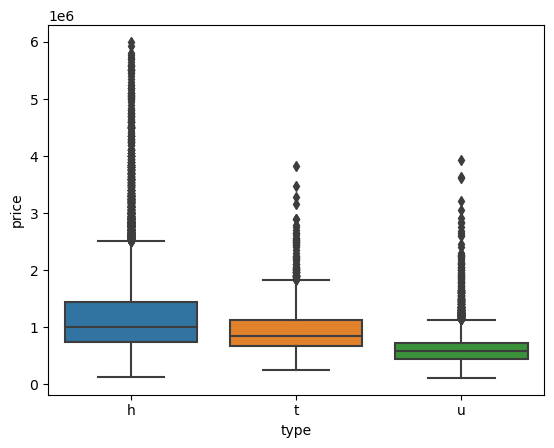

In [46]:
type_price = sns.boxplot(x='type',y='price',data=df2)
plt.show(type_price)

# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;

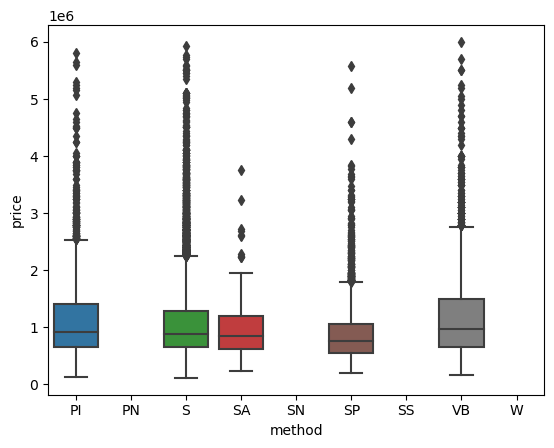

In [47]:
method_price = sns.boxplot(x='method',y='price',data=df2)
plt.show(method_price)

# 4.0 - Feature Engineering

In [79]:
df4 = df3.copy()

### 4.1 - Mindmap of hypotheses

#### 4.1.1 - My hypotheses

- **1.** Casas que tem um maior número de banheiros são mais caras
- **2.** Casas mais perto do centro comercial, são mais caras
- **3.** O preço médio varia de acordo com a região (A região pode aumentar ou diminuir o preço)
- **4.** O preço médio varia de acordo com o suburbio (O suburbio pode aumentar ou diminuir o preço)
- **5.** Casas que vão a leilão são mais baratas
- **6.** O tipo de casa (h,u,t) influencia no preço da casa
- **7.** O número de casas de um subúrbio influencia no preço de uma casa
- **8.** Quanto mais cômodos uma casa tem, mais cara ela é
- **9.** A venda de casas aumenta de acordo com o ano

#### 4.1.2 - Bussines questions

- **1.** Qual época do ano mais são vendidas casas?
- **2.** Qual a região que mais vende casa e qual sua média
- **3.** Qual a média de preço de cada região?

### 4.2 - Classification of hypoteses

### 4.3 - Feature Engineering

In [90]:
# Criar uma coluna ano
df4['year'] = df4['date'].dt.year

# 5.0 - Explore Data Analisys

### 5.1 - Univariate analisys

### 5.2 - Bivariate analisys

### 5.3 - multivariate analisys